<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Deep Learning</b></font></h1> 
<a href="mailto:rogerio.oliveira@mackenzie.br">Rogério de Oliveira</a><br>

<br>
<br>

---


<h1 align=left><font size = 6, style="color:rgb(200,0,0)">MLP com TensorFlow</font></h1>
<hr>

# **Case**: Steel Plates Fault

Aqui você vai trabalhar com um conjunto de dados sobre características de produção de chapas de aço, classificadas em 7 tipos diferentes de falhas ou defeitos. O objetivo é **treinar um modelo deep learning** (MLP TensorFlow/Keras) para o reconhecimento automático dos padrões de falha e sua classificação nos **7 tipos**.

[Dataset](https://meusite.mackenzie.br/rogerio/STEEL_faults.csv)

[Info](http://archive.ics.uci.edu/ml/datasets/steel+plates+faults)

**Type of dependent variables (7 Types of Steel Plates Faults):** 

> 1.Pastry

> 2.Z_Scratch

> 3.K_Scatch

> 4.Stains

> 5.Dirtiness

> 6.Bumps

> 7.Other_Faults



# imports


In [1]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

# Exercício. Acesse e Explore os Dados

Que transformações são necessárias para o treinamento dos dados?

In [2]:
df = pd.read_csv("http://meusite.mackenzie.br/rogerio/STEEL_faults.csv")

In [3]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [4]:
df.shape

(1941, 34)

# Exercício. Prepare os Dados de Entrada `X`

Lembre-se a normalização das entradas é necessária. Empregue o `scale`. 

In [31]:
drop_list = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
X = df.drop(columns=drop_list)

In [32]:
from sklearn.preprocessing import scale
X_norm = scale(X)

# Exercício. Prepare a saída `y`

Lembre-se no `Keras`/`TensorFlow` há uma saída binária para cada classe.

In [33]:
y = df.iloc[:, -7:]

# Exercício. Separe os dados de Treinamento e Teste

Empregue o scikit-learn para separar os dados de treinamento e teste. Empregue 0.3 de dados de teste e o `seed=1234` para geração dos dados. 

In [7]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, stratify=y, random_state=seed)

In [8]:
y_train.shape

(1358, 7)

# Exercício. Faça o Treinamento do Modelo Deep Learning

Empregue o modelo de código da aula para completar o código abaixo e treine o Modelo Neural. Você vai configurar camadas oculta de 16, 32, 16 neurônios e função de ativação `relu`. Empregue 0.2 para dados de validação e a função `sigmoid` nas camadas de entrada e saída.

In [11]:
from numpy.random import seed  # para garantir a reprodutibilidade dos resultados
seed(1234)
tf.random.set_seed(1234)

# modelo
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])])

# camada de entrada 
model.add(layers.Dense(7, activation='sigmoid'))

# camada ocultas
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

# camada de saída
model.add(layers.Dense(7, activation='sigmoid'))

# compilação do modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# treinamento do modelo com 0.2 dos dados para validação e 200 iterações de treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 16ms/step - loss: 1.8585 - accuracy: 0.3018 - val_loss: 1.7724 - val_accuracy: 0.3088
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 1.7005 - accuracy: 0.3613 - val_loss: 1.6458 - val_accuracy: 0.3088
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 1.5790 - accuracy: 0.3799 - val_loss: 1.5310 - val_accuracy: 0.4632
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 1.4226 - accuracy: 0.5344 - val_loss: 1.3937 - val_accuracy: 0.4743
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 1.3747 - accuracy: 0.4866 - val_loss: 1.3329 - val_accuracy: 0.4743
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 1.3005 - accuracy: 0.4949 - val_loss: 1.2974 - val_accuracy: 0.4706
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 1.2630 - accuracy: 0.4970 - val_loss: 1.2782 - val_accuracy: 0.4816
Epoch 8/200


Epoch 59/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7482 - accuracy: 0.6955 - val_loss: 0.7970 - val_accuracy: 0.6838
Epoch 60/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7242 - accuracy: 0.7053 - val_loss: 0.7779 - val_accuracy: 0.7059
Epoch 61/200
34/34 [==============================] - 0s 2ms/step - loss: 0.7418 - accuracy: 0.7069 - val_loss: 0.7959 - val_accuracy: 0.6691
Epoch 62/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.7262 - val_loss: 0.8045 - val_accuracy: 0.6912
Epoch 63/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.7129 - val_loss: 0.8232 - val_accuracy: 0.6875
Epoch 64/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.7326 - val_loss: 0.7938 - val_accuracy: 0.6618
Epoch 65/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7268 - accuracy: 0.7113 - val_loss: 0.7667 - val_accuracy: 0.7279
Epoch 

34/34 [==============================] - 0s 3ms/step - loss: 0.5096 - accuracy: 0.7899 - val_loss: 0.7890 - val_accuracy: 0.7279
Epoch 174/200
34/34 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.8030 - val_loss: 0.8194 - val_accuracy: 0.7279
Epoch 175/200
34/34 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7944 - val_loss: 0.7933 - val_accuracy: 0.7353
Epoch 176/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.8055 - val_loss: 0.8167 - val_accuracy: 0.7132
Epoch 177/200
34/34 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.8033 - val_loss: 0.8116 - val_accuracy: 0.7316
Epoch 178/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7925 - val_loss: 0.7954 - val_accuracy: 0.7279
Epoch 179/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7982 - val_loss: 0.8323 - val_accuracy: 0.7096
Epoch 180/200

# Exercício. Visualize o modelo

Empregue o comando `model.summary()` para exibir o modelo. O código a seguir exibe graficamente a rede criada.


In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 27)                756       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 196       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 119       
Total params: 2,271
Trainable params: 2,271
Non-trainable params: 0
______________________________________________________

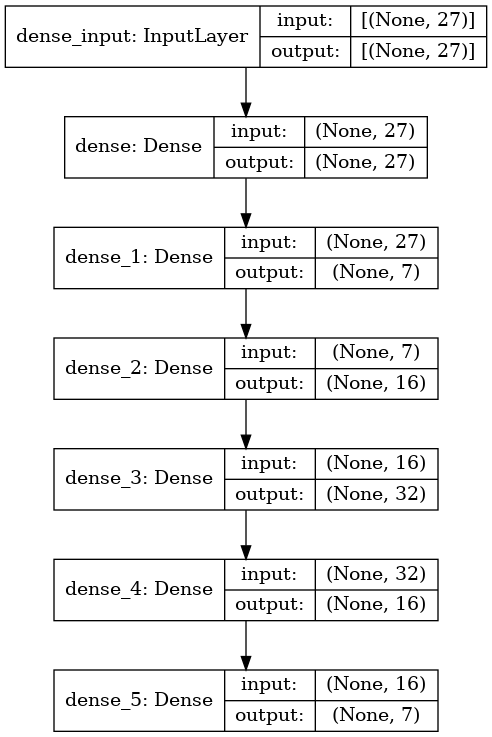

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Exercício. Análise o Treinamento da Rede

Empregue a função `plot_loss_acc` abaixo (veja a sintaxe da chamada na teoria) para analisar o treinamento da rede. 

In [15]:
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc


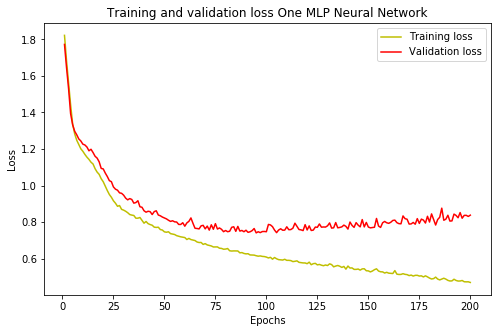

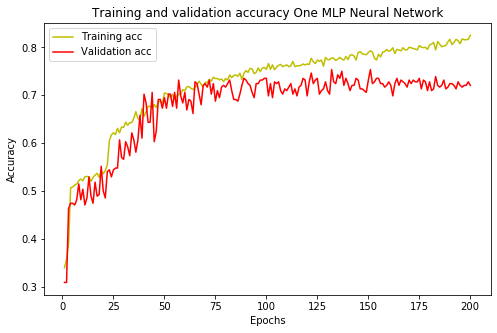

One MLP Neural NetworkAccuracy Train: 82.50 %, Accuracy Test: 72.06 %


In [16]:
loss, val_loss, acc, val_acc = plot_loss_acc(history,'One MLP Neural Network')


# Overfitting

O *overfitting* se caracteriza por um sobreajuste do conjunto de treinamento durante o aprendizado. Esse *sobreaprendizado*  produz uma acuracidade excessiva do modelo no conjunto de treinamento e leva a modelos pouco generalizados. Em outras palavras, o modelo prevê corretamente a grande maioria dos casos conhecidos, mas tende a falhar na predição de novos casos.  

É um problema bastante comum para Árvores de Decisão de Modelos Neurais. Para modelos Neurais o **Drop Out** e a redução de épocas de treinamento são as técnicas mais empregadas. (para Árvores de Decisão, o uso de Random Forest é em geral a melhor solução).

Você pode identificar o overfitting buscando o ponto em que as curvas de aprendizado do conjunto de treinamento e de validação passam a divergir, isto é, erro no conjunto de treinamento se reduz mas sem uma correspondente redução no conjunto de teste. 

<br>
<br>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/300px-Overfitting.svg.png" width=300, align="center"> 



# Exercício. Reduzindo o *Overfitting* 

Aqui empregaremos uma técnica chamada `drop out`. Basta reproduzir o resto da solução aqui. Você ainda pode reduzir o númere de épocas verificando o número adequado no gráfico de evolução do treinamento da rede.

In [9]:
all_results = [] 
from keras.layers import Dropout

from numpy.random import seed
seed(1234)
tf.random.set_seed(1234)

# Modelo
# ...
# modelo
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])])

# Drop Out
model.add(Dropout(0.20))

# camada de entrada 
model.add(layers.Dense(7, activation='sigmoid'))

# camada ocultas
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

# Resto do modelo e treinamento...
# ...
# camada de saída
model.add(layers.Dense(7, activation='sigmoid'))

# compilação do modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# treinamento do modelo com 0.2 dos dados para validação e 200 iterações de treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)


Epoch 1/200
34/34 [==============================] - 1s 13ms/step - loss: 1.8592 - accuracy: 0.3052 - val_loss: 1.7700 - val_accuracy: 0.3088
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 1.6982 - accuracy: 0.3613 - val_loss: 1.6422 - val_accuracy: 0.3088
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 1.5803 - accuracy: 0.3881 - val_loss: 1.5196 - val_accuracy: 0.4816
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 1.4198 - accuracy: 0.5252 - val_loss: 1.3898 - val_accuracy: 0.4779
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 1.4004 - accuracy: 0.4690 - val_loss: 1.3374 - val_accuracy: 0.4779
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 1.3282 - accuracy: 0.4915 - val_loss: 1.2995 - val_accuracy: 0.4743
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 1.3020 - accuracy: 0.4925 - val_loss: 1.2827 - val_accuracy: 0.4706
Epoch 8/200


Epoch 59/200
34/34 [==============================] - 0s 4ms/step - loss: 0.8845 - accuracy: 0.6537 - val_loss: 0.8839 - val_accuracy: 0.6176
Epoch 60/200
34/34 [==============================] - 0s 4ms/step - loss: 0.8503 - accuracy: 0.6408 - val_loss: 0.8758 - val_accuracy: 0.6250
Epoch 61/200
34/34 [==============================] - 0s 4ms/step - loss: 0.8758 - accuracy: 0.6454 - val_loss: 0.8973 - val_accuracy: 0.5846
Epoch 62/200
34/34 [==============================] - 0s 4ms/step - loss: 0.8458 - accuracy: 0.6134 - val_loss: 0.8841 - val_accuracy: 0.5956
Epoch 63/200
34/34 [==============================] - 0s 4ms/step - loss: 0.9003 - accuracy: 0.6016 - val_loss: 0.9035 - val_accuracy: 0.5919
Epoch 64/200
34/34 [==============================] - 0s 4ms/step - loss: 0.8490 - accuracy: 0.6350 - val_loss: 0.8839 - val_accuracy: 0.6176
Epoch 65/200
34/34 [==============================] - 0s 4ms/step - loss: 0.8793 - accuracy: 0.6223 - val_loss: 0.8609 - val_accuracy: 0.6581
Epoch 

34/34 [==============================] - 0s 4ms/step - loss: 0.7512 - accuracy: 0.6892 - val_loss: 0.7668 - val_accuracy: 0.7022
Epoch 117/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7103 - accuracy: 0.7010 - val_loss: 0.7587 - val_accuracy: 0.6949
Epoch 118/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.7079 - val_loss: 0.7596 - val_accuracy: 0.7022
Epoch 119/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.7060 - val_loss: 0.7786 - val_accuracy: 0.6985
Epoch 120/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7807 - accuracy: 0.6672 - val_loss: 0.7614 - val_accuracy: 0.7022
Epoch 121/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7929 - accuracy: 0.6603 - val_loss: 0.7597 - val_accuracy: 0.7132
Epoch 122/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7220 - accuracy: 0.7041 - val_loss: 0.7474 - val_accuracy: 0.7059
Epoch 123/200

34/34 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.7256 - val_loss: 0.7434 - val_accuracy: 0.7096
Epoch 174/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.7358 - val_loss: 0.7421 - val_accuracy: 0.7353
Epoch 175/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.7303 - val_loss: 0.7385 - val_accuracy: 0.7243
Epoch 176/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7039 - accuracy: 0.6927 - val_loss: 0.7422 - val_accuracy: 0.7059
Epoch 177/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.7325 - val_loss: 0.7287 - val_accuracy: 0.7243
Epoch 178/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.7350 - val_loss: 0.7196 - val_accuracy: 0.7206
Epoch 179/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.7285 - val_loss: 0.7478 - val_accuracy: 0.6949
Epoch 180/200

# Exercício. Fazendo a Predição dos dados de Teste

Faça a predição dos casos de teste e analise os resultados empregando o `classification_report` do `scikit-learn`.

Lembre-se, cada neurônio de saída da rede retorna a probabilidade de uma das 7 classes, e a seleção do neurônio com maior probabilidade retorna a classe mais provável (empregue o comando `np.argmax()`).

In [34]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [35]:
y_test_l = [np.argmax(i) for i in np.array(y_test)]

In [36]:
print(classification_report(y_pred,y_test_l))

              precision    recall  f1-score   support

           0       0.49      0.66      0.56        35
           1       0.88      0.85      0.86        59
           2       0.94      0.95      0.94       116
           3       0.95      0.88      0.91        24
           4       0.24      1.00      0.38         4
           5       0.50      0.70      0.58        86
           6       0.80      0.63      0.70       259

    accuracy                           0.74       583
   macro avg       0.68      0.81      0.71       583
weighted avg       0.78      0.74      0.75       583



# Exercício. Faça o Treinamento de outros Modelos

Faça o treinamento de outras configurações e procude obter um acuracidade do conjunto de teste superior aos resultados obtidos até aqui. Discuta os seus resultados.

In [70]:
all_results = [] 
from keras.layers import Dropout

from numpy.random import seed
seed(1234)
tf.random.set_seed(1234)

# Modelo
# ...
# modelo
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])])

# Drop Out
model.add(Dropout(0.20))

# camada de entrada 
model.add(layers.Dense(7, activation='sigmoid'))

# camada ocultas
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

# Resto do modelo e treinamento...
# ...
# camada de saída
model.add(layers.Dense(7, activation='sigmoid'))

# compilação do modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# treinamento do modelo com 0.2 dos dados para validação e 200 iterações de treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 8ms/step - loss: 1.8731 - accuracy: 0.1987 - val_loss: 1.7703 - val_accuracy: 0.3088
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 1.7152 - accuracy: 0.3613 - val_loss: 1.6928 - val_accuracy: 0.3088
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 1.6427 - accuracy: 0.3754 - val_loss: 1.6288 - val_accuracy: 0.4559
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 1.5372 - accuracy: 0.5091 - val_loss: 1.4778 - val_accuracy: 0.4669
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 1.4673 - accuracy: 0.4720 - val_loss: 1.4103 - val_accuracy: 0.4779
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 1.3909 - accuracy: 0.4859 - val_loss: 1.3559 - val_accuracy: 0.4779
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 1.3502 - accuracy: 0.5032 - val_loss: 1.3289 - val_accuracy: 0.4743
Epoch 8/200
3

Epoch 59/200
34/34 [==============================] - 0s 3ms/step - loss: 0.8568 - accuracy: 0.6497 - val_loss: 0.8584 - val_accuracy: 0.6507
Epoch 60/200
34/34 [==============================] - 0s 3ms/step - loss: 0.8641 - accuracy: 0.6412 - val_loss: 0.8456 - val_accuracy: 0.6801
Epoch 61/200
34/34 [==============================] - 0s 3ms/step - loss: 0.8531 - accuracy: 0.6441 - val_loss: 0.8646 - val_accuracy: 0.6213
Epoch 62/200
34/34 [==============================] - 0s 3ms/step - loss: 0.8209 - accuracy: 0.6309 - val_loss: 0.8580 - val_accuracy: 0.6287
Epoch 63/200
34/34 [==============================] - 0s 2ms/step - loss: 0.8426 - accuracy: 0.6319 - val_loss: 0.8673 - val_accuracy: 0.6287
Epoch 64/200
34/34 [==============================] - 0s 3ms/step - loss: 0.8516 - accuracy: 0.6448 - val_loss: 0.8757 - val_accuracy: 0.5919
Epoch 65/200
34/34 [==============================] - 0s 2ms/step - loss: 0.8778 - accuracy: 0.6346 - val_loss: 0.8562 - val_accuracy: 0.6397
Epoch 

34/34 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.7082 - val_loss: 0.7727 - val_accuracy: 0.6801
Epoch 174/200
34/34 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.7363 - val_loss: 0.7632 - val_accuracy: 0.6985
Epoch 175/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.6929 - val_loss: 0.7592 - val_accuracy: 0.6949
Epoch 176/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7575 - accuracy: 0.6791 - val_loss: 0.7567 - val_accuracy: 0.7132
Epoch 177/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7361 - accuracy: 0.6970 - val_loss: 0.7606 - val_accuracy: 0.6985
Epoch 178/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7770 - accuracy: 0.6954 - val_loss: 0.7574 - val_accuracy: 0.6875
Epoch 179/200
34/34 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.7130 - val_loss: 0.7643 - val_accuracy: 0.6949
Epoch 180/200